In [1]:
print("hi")

hi


In [2]:
%pip install tenserflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import backend as K

import numpy
import pandas as pd

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

NameError: name 'mnist' is not defined

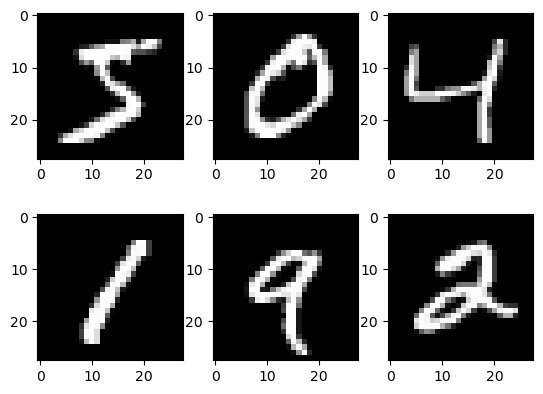

In [3]:
import matplotlib.pyplot as plt

for i in range(6):
    plt.subplot(int('23' + str(i+1)))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28,1).astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

NameError: name 'to_categorical' is not defined

In [30]:
#normalization
X_train = X_train / 255
X_test = X_test / 255

In [34]:
#define a CNN model
def create_model():
    num_classes = 10
    input_shape = (28, 28, 1)
    model = Sequential()
    model.add(Convolution2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

#build the model
model = create_model()

In [35]:
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
print("The model has successfully trained")

#save the model
model.save('model.h5')
print("The model has successfully saved")


Epoch 1/10
300/300 - 87s - loss: 0.2197 - accuracy: 0.9327 - val_loss: 0.0500 - val_accuracy: 0.9840 - 87s/epoch - 290ms/step
Epoch 2/10
300/300 - 88s - loss: 0.0679 - accuracy: 0.9792 - val_loss: 0.0353 - val_accuracy: 0.9886 - 88s/epoch - 293ms/step
Epoch 3/10
300/300 - 91s - loss: 0.0481 - accuracy: 0.9855 - val_loss: 0.0300 - val_accuracy: 0.9890 - 91s/epoch - 303ms/step
Epoch 4/10
300/300 - 91s - loss: 0.0393 - accuracy: 0.9882 - val_loss: 0.0280 - val_accuracy: 0.9913 - 91s/epoch - 304ms/step
Epoch 5/10
300/300 - 91s - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0264 - val_accuracy: 0.9909 - 91s/epoch - 305ms/step
Epoch 6/10
300/300 - 94s - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0265 - val_accuracy: 0.9908 - 94s/epoch - 314ms/step
Epoch 7/10
300/300 - 94s - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.0250 - val_accuracy: 0.9928 - 94s/epoch - 313ms/step
Epoch 8/10
300/300 - 95s - loss: 0.0205 - accuracy: 0.9936 - val_loss: 0.0254 - val_accuracy: 0.9917 - 95s/epoch - 317

In [36]:
#Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 0.66%


In [37]:
print("CNN Accuracy: %.2f%%" % (scores[1]*100))

CNN Accuracy: 99.34%
